## <div style="text-align: center;">Complex NetworkAnalysis - Assignment 3</div>

In [162]:
#import required library
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1. Create a directed graph with 6 nodes and 9 directed edges with no self loops. Find the number of common neighbours between any two given nodes

The number of nodes in the graph is: 6
The number of edges in the graph is: 9
The common neighbors between nodes V1 and V5 are: ['V6']
The common neighbors between nodes V2 and V3 are: ['V5']


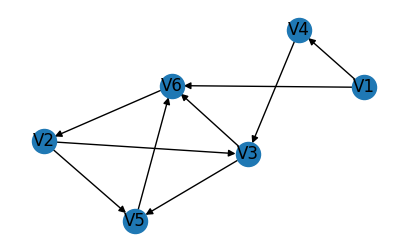

In [120]:
#find common neighbors
def findCommonNeighbors_between_two_nodes(G,node1,node2):
    #we cannot use common_neigbors for a Digraph, we need to find the predecessors and successors with the below code
    common_predecessors = set(G.predecessors(node1)).intersection(G.predecessors(node2)) #incomming node
    common_successors = set(G.successors(node1)).intersection(G.successors(node2)) #outgoing node

    # take a union between the two, it means get the common nodes for the two.
    common_neighbors = common_predecessors.union(common_successors)
    print(f"The common neighbors between nodes {node1} and {node2} are: {list(common_neighbors)}")    

G = nx.DiGraph() # first we are making a directed graph
#we have a clear requirement that we should not be using self loop, example we should not use ('V1','V1'), this will create a self loop
G.add_edges_from([('V1', 'V6'), ('V1', 'V4'), ('V2', 'V5'), ('V3', 'V5'), ('V5', 'V6'), ('V4', 'V3'), ('V5', 'V6'), ('V6', 'V2'), ('V2', 'V3'),('V3', 'V6')])

print(f"The number of nodes in the graph is: {G.number_of_nodes()}")
print(f"The number of edges in the graph is: {G.number_of_edges()}")

# change the value below, to see the common neighbors between any two nodes
common_neighbors = findCommonNeighbors_between_two_nodes(G,'V1','V5')
common_neighbors = findCommonNeighbors_between_two_nodes(G,'V2','V3')

fix,ax = plt.subplots(figsize=(5,3))
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,with_labels=True,ax=ax)

### 2. Create a Digraph from the given edge list file(ties.csv) that shows the marriage ties between various families


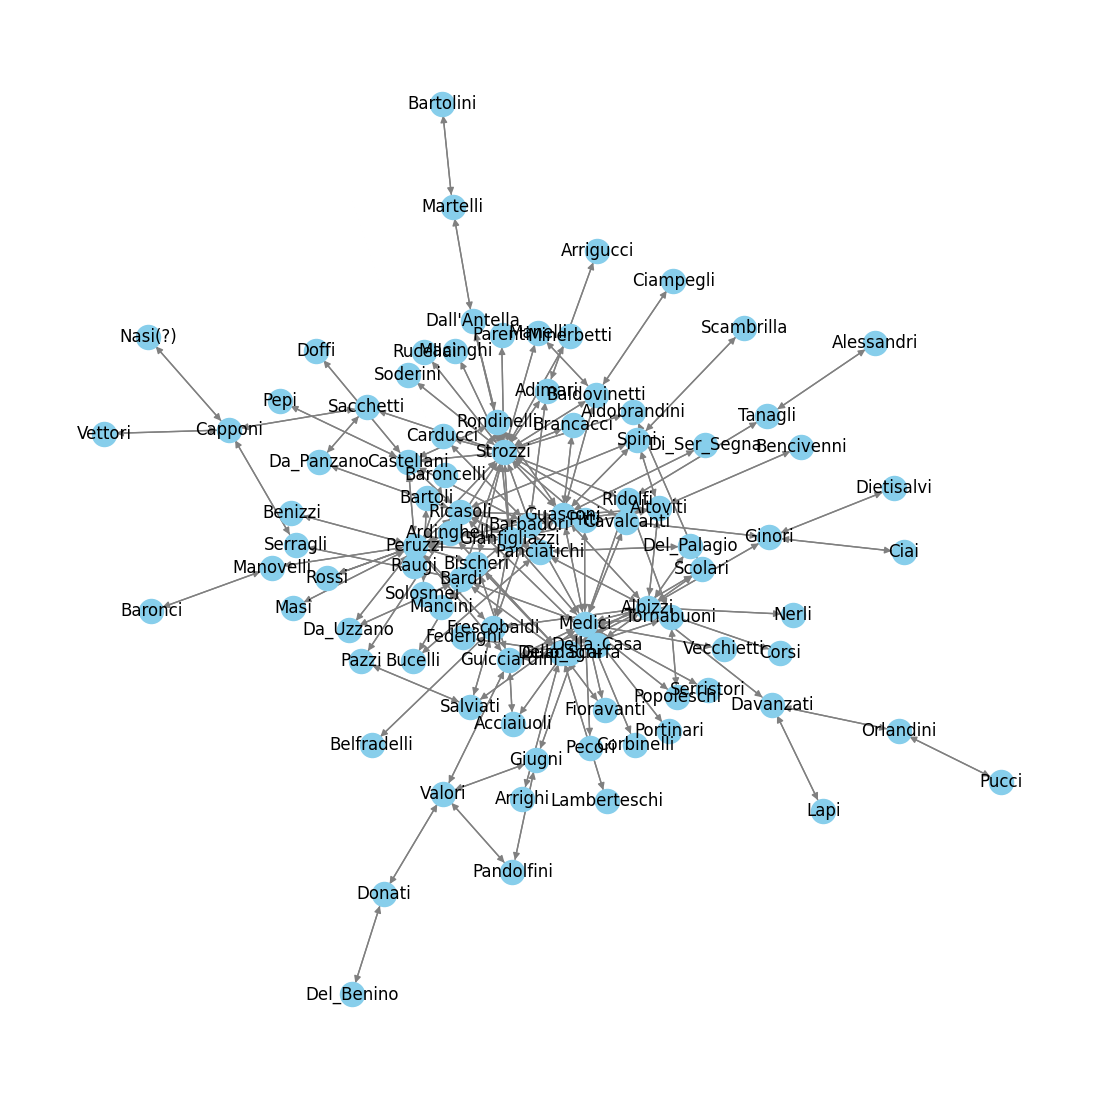

In [121]:
file_path = 'ties.xlsx' 
df = pd.read_excel(file_path)

# Convert DataFrame to a list
edge_list = df[['FamilyA', 'FamilyB']].values.tolist()
edge_list

family_graph = nx.DiGraph()
family_graph.add_edges_from(edge_list)

#Draw the network Graph
fix,ax = plt.subplots(figsize=(14,14))
pos = nx.kamada_kawai_layout(family_graph)
nx.draw(family_graph,pos,with_labels=True,ax=ax,node_color='skyblue', edge_color='gray')


### 3. Write a function that takes a family name as input and find all the direct ties it has with other families. Visualize it suitably


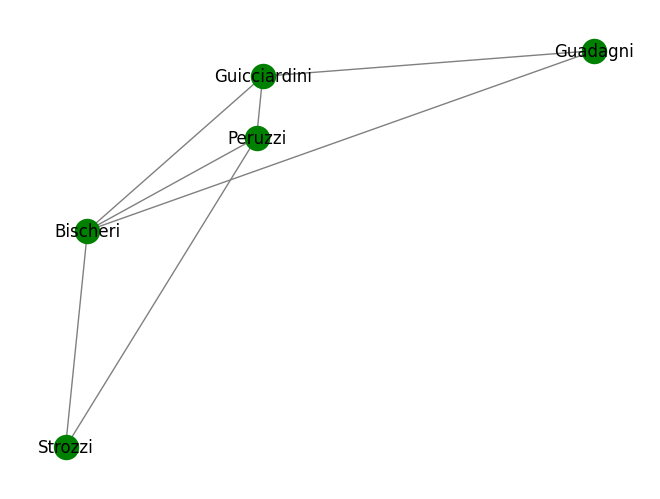

In [122]:
#method to show a relationship between a family name to all the other family it is related to
def findDirectTies_with_otherFamilies(G, family_name):
    neighbors = list(G.neighbors(family_name))
    subgraph_nodes = [family_name] + neighbors
            
    subgraph = G.subgraph(subgraph_nodes)
    pos = nx.random_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color='Green', edge_color='gray')

family_name_graph = nx.Graph()
family_name_graph.add_edges_from(edge_list)
findDirectTies_with_otherFamilies(family_name_graph,"Bischeri")

### 4. Find the family with most number of direct ties (Use degree centrality). Find their degree distribution.


The family with the most direct ties is Strozzi with a degree centrality of 0.53


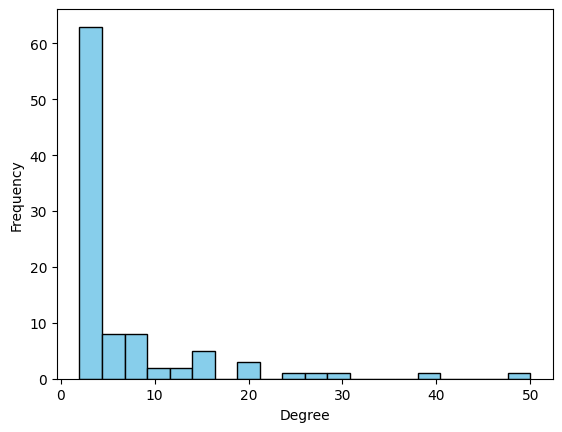

In [123]:
#find the degree centraility
def find_family_with_max_direct_ties(G):
    degree_centrality = nx.degree_centrality(G)   
    max_family = max(degree_centrality, key=degree_centrality.get)
    max_degree = degree_centrality[max_family]
           
    return (max_family,max_degree)

def plot_degree_distribution(G):
    degrees = dict(G.degree())
    #print(degrees)
    degree_values = list(degrees.values())
    #print(degree_values)
    
    plt.hist(degree_values, bins=20, color='skyblue', edgecolor='black')   
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()


# Find the family with the most direct ties using degree centrality, we will reutrn tuple and print
(max_family,max_degree) = find_family_with_max_direct_ties(family_graph)
print(f"The family with the most direct ties is {max_family} with a degree centrality of {max_degree:.2f}")

# plotinng degree distribution
plot_degree_distribution(family_graph)


### 5. Write a function that takes a family name F, as the parameter and find how important is F in maintaining efficient relationship in the marriage network(Use betweenness centrality) Visualize it suitably.

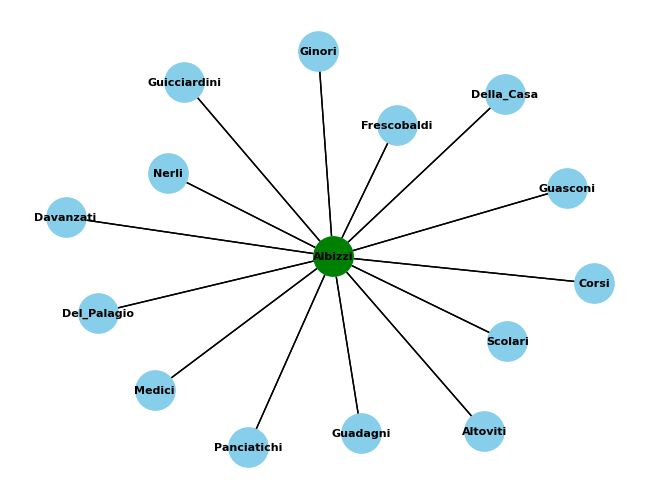

In [147]:
#method to calculate the importance of a Family A person with Family B person.
def calculate_betweenness_centrality(family_data, family_name):
       
    G = nx.Graph()

    # Add edges to the graph
    for edge in family_data:
        if edge[0] == family_name:  
            G.add_edge(edge[0], edge[1])

    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)

    # Get the betweenness centrality of the specified family
    family_betweenness = betweenness_centrality.get(family_name, 0)

    # Visualize the network
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue', font_size=8)

    # Add one more graph to display the main node in green color
    nx.draw(G, pos, nodelist=[family_name], node_size=800, node_color='green')
   

family_name_to_check = 'Albizzi'
betweenness = calculate_betweenness_centrality(edge_list, family_name_to_check)



### 6. Find a node that is most efficient in spreading the news of families. (Use closeness centrality)


In [161]:
#method to find the closeness centraility, this will identify the closeness of a node with other node
def find_closeness_score_node(family_data):
       
    G = nx.Graph()

    # Add edges to the graph
    for edge in family_data:         
        G.add_edge(edge[0], edge[1])   
    
    # Calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)    

    # Find the node with the highest closeness centrality, this will take hte the max value
    most_efficient_node = max(closeness_centrality, key=closeness_centrality.get)  
    
    #populate the centraility score for the efficient node identified
    centrality_score = closeness_centrality[most_efficient_node]

    return (most_efficient_node,centrality_score) #return tuple

(most_efficient_node,centrality_score) = find_most_efficient_node(edge_list)

print(f"The most efficient node in spreading news is: {most_efficient_node} with centrality score : {centrality_score}")


The most efficient node in spreading news is: Strozzi with centrality score : 0.4275843454790823
